In [ ]:
"""import zipfile
fold='/content/drive/MyDrive/NNDL Project/Released_Data-20221213T224609Z-001.zip'
!unzip -u "/content/drive/MyDrive/NNDL Project/Released_Data-20221213T224609Z-001.zip" -d "/content/drive/MyDrive/NNDL Project/"

"""

In [ ]:
"""
!unzip -u "/content/drive/MyDrive/NNDL Project/Released_Data/test_shuffle.zip" -d "/content/drive/MyDrive/NNDL Project/"
"""

In [ ]:
"""
!unzip -u "/content/drive/MyDrive/NNDL Project/Released_Data/train_shuffle.zip" -d "/content/drive/MyDrive/NNDL Project/"
"""

In [1]:
#loading data
import os
import sys
import numpy as np
import pandas as pd

full_imgs = np.array(os.listdir('/content/drive/MyDrive/NNDL Project/train_shuffle'))
full_labels = pd.read_csv('/content/drive/MyDrive/NNDL Project/Released_Data/train_data.csv').to_numpy()

labels_list = [set(),set(),set()]

#prepare lists based on the super classes
labels_list = [{}, {}, {}]
val_labels_list = [{}, {}, {}]

for i in range(len(full_labels)):
    if full_labels[i][2] in labels_list[full_labels[i][1]]:
        labels_list[full_labels[i][1]][full_labels[i][2]] += 1
    else:
        labels_list[full_labels[i][1]][full_labels[i][2]] = 1
        val_labels_list[full_labels[i][1]][full_labels[i][2]] = 0

# Check the number of times each sub class appears
print(dict(sorted(labels_list[0].items(), key=lambda item: item[1])))
print(dict(sorted(labels_list[1].items(), key=lambda item: item[1])))
print(dict(sorted(labels_list[2].items(), key=lambda item: item[1])))

#Splitting the train and validation datasets (90 - 10 split)
train_imgs = []
val_imgs = []

for i in range(len(full_labels)):
    if val_labels_list[full_labels[i][1]][full_labels[i][2]] <= (0.1)*(labels_list[full_labels[i][1]][full_labels[i][2]]):
        val_labels_list[full_labels[i][1]][full_labels[i][2]] += 1
        val_imgs.append(full_labels[i][0])
    else:
        train_imgs.append(full_labels[i][0])

#Check if there is any common image between training and validation datasets
common_names = [name for name in train_imgs if name in val_imgs]
print("Common names: ", common_names)

train_data = full_labels[np.isin(full_labels[:, 0], train_imgs)]
val_data = full_labels[np.isin(full_labels[:, 0], val_imgs)]

#Check if there is any name missing from the training dataset
ver_train_names = train_data[:, 0]
error_names = [name for name in ver_train_names if name not in train_imgs]
print("Error names: ", error_names)

print("Total number of images: ", len(full_imgs))
print("Number of training images: ", train_data.shape)
print("Number of validation images: ", val_data.shape)

{74: 51, 11: 51, 14: 51, 5: 51, 41: 51, 16: 51, 85: 51, 52: 51, 40: 51, 57: 51, 79: 51, 82: 51, 42: 51, 88: 51, 8: 51, 26: 51, 20: 51, 60: 51, 61: 51, 81: 51, 84: 51, 19: 51, 24: 100, 30: 100, 27: 100, 6: 100, 28: 100, 76: 100, 86: 100, 4: 100}
{12: 50, 38: 50, 10: 50, 45: 50, 80: 50, 87: 50, 23: 50, 32: 50, 9: 50, 17: 50, 2: 50, 55: 50, 78: 50, 54: 50, 0: 50, 25: 50, 63: 100, 49: 100, 22: 100, 18: 100, 7: 100, 66: 100, 71: 100, 37: 100, 65: 100, 31: 100, 21: 100, 46: 100, 36: 100}
{48: 50, 68: 50, 69: 50, 75: 50, 3: 50, 56: 50, 33: 50, 34: 50, 39: 50, 13: 50, 15: 50, 72: 100, 43: 100, 1: 100, 53: 100, 67: 100, 58: 100, 59: 100, 35: 100, 70: 100, 73: 100, 77: 100, 51: 100, 64: 100, 44: 100, 29: 100, 50: 100, 83: 100, 62: 100, 47: 100}
Common names:  []
Error names:  []
Total number of images:  6472
Number of training images:  (5738, 3)
Number of validation images:  (734, 3)


In [ ]:
full_imgs[0]

'5824.jpg'

In [ ]:
train_data[0][0]

'328.jpg'

In [2]:
# import the modules
import os
from os import listdir
import sys
import pandas as pd
import cv2
 
# get the path or directory
folder_dir = "/content/drive/MyDrive/NNDL Project/train_shuffle"
X_train=[]
Y_train=[]
Y_train2=[]

for i in train_data:
  name=i[0]
  img = cv2.imread(os.path.join(folder_dir, name))
  img=img.flatten()/255
  X_train.append(img)
  Y_train.append(i[1])
  Y_train2.append(i[2])






In [3]:
X_val=[]
Y_val=[]
Y_val2=[]
for i in val_data:
  name=i[0]
  img = cv2.imread(os.path.join(folder_dir, name))
  img=img.flatten()/255
  X_val.append(img)
  Y_val.append(i[1])
  Y_val2.append(i[2])



In [ ]:
len(X_train)

5738

In [4]:
type(Y_train)
Y_train=np.array(Y_train)
type(Y_train)

numpy.ndarray

In [5]:
Y_train2=np.array(Y_train2)

In [6]:
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


In [7]:
Y_cat_train=to_categorical(Y_train2)

In [8]:
Y_cat_train.shape

(5738, 89)

In [9]:
Y_cat_val=to_categorical(np.array(Y_val2))

In [10]:
Y_cat_val.shape

(734, 89)

In [11]:
X_train=np.array(X_train)
X_val=np.array(X_val)

In [12]:
print(X_train.shape)
print(X_val.shape)

(5738, 192)
(734, 192)


In [ ]:
from keras.layers import LeakyReLU
model=Sequential()
model.add(Dense(4096,input_shape = (192,),activation = 'relu'))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(180))
model.add(LeakyReLU(alpha=0.05))
#model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='softmax'))


In [41]:
hist_val_acc=[]
hist_train_acc=[]
label=[]

In [42]:
from keras.layers import LeakyReLU
model=Sequential()
model.add(Dense(256,input_shape = (192,),activation = 'relu'))
model.add(Dropout(0.15))
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(0.15))
#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.2))
#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.15))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(178,activation='relu'))

#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(3,activation='relu'))

model.add(Dense(89,activation='softmax'))


In [43]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 256)               49408     
                                                                 
 dropout_30 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 512)               131584    
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 512)               262656    
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_40 (Dense)            (None, 256)              

In [44]:
from keras.optimizers import Adam
adam=Adam(
    learning_rate=0.0005,
    beta_1=0.95,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,

)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
model.fit(X_train, Y_cat_train, validation_data = (X_val, Y_cat_val), epochs =200 )

Epoch 1/200
180/180 [==============================] - 1s 5ms/step - loss: 4.4605 - accuracy: 0.0145 - val_loss: 4.4109 - val_accuracy: 0.0232
Epoch 2/200
180/180 [==============================] - 1s 4ms/step - loss: 4.3306 - accuracy: 0.0343 - val_loss: 4.2206 - val_accuracy: 0.0381
Epoch 3/200
180/180 [==============================] - 1s 4ms/step - loss: 4.1616 - accuracy: 0.0565 - val_loss: 4.0718 - val_accuracy: 0.0613
Epoch 4/200
180/180 [==============================] - 1s 4ms/step - loss: 4.0422 - accuracy: 0.0631 - val_loss: 4.0097 - val_accuracy: 0.0668
Epoch 5/200
180/180 [==============================] - 1s 4ms/step - loss: 3.9507 - accuracy: 0.0744 - val_loss: 3.8747 - val_accuracy: 0.0804
Epoch 6/200
180/180 [==============================] - 1s 4ms/step - loss: 3.8466 - accuracy: 0.0882 - val_loss: 3.8736 - val_accuracy: 0.0831
Epoch 7/200
180/180 [==============================] - 1s 4ms/step - loss: 3.7638 - accuracy: 0.0988 - val_loss: 3.7835 - val_accuracy: 0.0926

In [45]:
hist_train_acc.append(model.history.history["accuracy"])
hist_val_acc.append(model.history.history["val_accuracy"])
label.append("alpha=0.0005 and params=597,849 and droput=0.15")

In [46]:
from keras.layers import LeakyReLU
model=Sequential()
model.add(Dense(256,input_shape = (192,),activation = 'relu'))
model.add(Dropout(0.25))
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(0.15))
#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.25))
#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.15))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(178,activation='relu'))

#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(3,activation='relu'))

model.add(Dense(89,activation='softmax'))


In [47]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               49408     
                                                                 
 dropout_34 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 512)               131584    
                                                                 
 dropout_35 (Dropout)        (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 512)               262656    
                                                                 
 dropout_36 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 256)              

In [48]:
from keras.optimizers import Adam
adam=Adam(
    learning_rate=0.0005,
    beta_1=0.95,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,

)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
model.fit(X_train, Y_cat_train, validation_data = (X_val, Y_cat_val), epochs =200 )

Epoch 1/200
180/180 [==============================] - 1s 5ms/step - loss: 4.4618 - accuracy: 0.0176 - val_loss: 4.4234 - val_accuracy: 0.0286
Epoch 2/200
180/180 [==============================] - 1s 4ms/step - loss: 4.3598 - accuracy: 0.0352 - val_loss: 4.2530 - val_accuracy: 0.0409
Epoch 3/200
180/180 [==============================] - 1s 4ms/step - loss: 4.1946 - accuracy: 0.0490 - val_loss: 4.0909 - val_accuracy: 0.0545
Epoch 4/200
180/180 [==============================] - 1s 4ms/step - loss: 4.0965 - accuracy: 0.0573 - val_loss: 4.0263 - val_accuracy: 0.0681
Epoch 5/200
180/180 [==============================] - 1s 4ms/step - loss: 4.0140 - accuracy: 0.0624 - val_loss: 3.9890 - val_accuracy: 0.0695
Epoch 6/200
180/180 [==============================] - 1s 4ms/step - loss: 3.9269 - accuracy: 0.0730 - val_loss: 3.9094 - val_accuracy: 0.0654
Epoch 7/200
180/180 [==============================] - 1s 4ms/step - loss: 3.8716 - accuracy: 0.0742 - val_loss: 3.8302 - val_accuracy: 0.0790

In [49]:
hist_train_acc.append(model.history.history["accuracy"])
hist_val_acc.append(model.history.history["val_accuracy"])
label.append("alpha=0.0010 and params=597,849 and droput=0.25")

In [50]:
model=Sequential()
model.add(Dense(256,input_shape = (192,),activation = 'relu'))
model.add(Dropout(0.2))
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(0.15))
#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(178,activation='relu'))

#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(3,activation='relu'))

model.add(Dense(89,activation='softmax'))

In [51]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 256)               49408     
                                                                 
 dropout_38 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 512)               131584    
                                                                 
 dropout_39 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_40 (Dropout)        (None, 1024)              0         
                                                                 
 dense_50 (Dense)            (None, 512)              

In [52]:

adam=Adam(
    learning_rate=0.0005,
    beta_1=0.95,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,

)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
model.fit(X_train, Y_cat_train, validation_data = (X_val, Y_cat_val), epochs =200 )

Epoch 1/200
180/180 [==============================] - 2s 5ms/step - loss: 4.4623 - accuracy: 0.0132 - val_loss: 4.4325 - val_accuracy: 0.0232
Epoch 2/200
180/180 [==============================] - 1s 4ms/step - loss: 4.3689 - accuracy: 0.0274 - val_loss: 4.3217 - val_accuracy: 0.0341
Epoch 3/200
180/180 [==============================] - 1s 4ms/step - loss: 4.2242 - accuracy: 0.0403 - val_loss: 4.1599 - val_accuracy: 0.0531
Epoch 4/200
180/180 [==============================] - 1s 4ms/step - loss: 4.0950 - accuracy: 0.0526 - val_loss: 4.0557 - val_accuracy: 0.0708
Epoch 5/200
180/180 [==============================] - 1s 4ms/step - loss: 4.0197 - accuracy: 0.0633 - val_loss: 3.9707 - val_accuracy: 0.0654
Epoch 6/200
180/180 [==============================] - 1s 4ms/step - loss: 3.9358 - accuracy: 0.0706 - val_loss: 3.8855 - val_accuracy: 0.0817
Epoch 7/200
180/180 [==============================] - 1s 4ms/step - loss: 3.8733 - accuracy: 0.0727 - val_loss: 3.8861 - val_accuracy: 0.0804

In [53]:
hist_train_acc.append(model.history.history["accuracy"])
hist_val_acc.append(model.history.history["val_accuracy"])
label.append("alpha=0.0005 and params=1385305 and droput=0.2")

In [54]:
model=Sequential()
model.add(Dense(256,input_shape = (192,),activation = 'relu'))
model.add(Dropout(0.3))
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(0.15))
#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(178,activation='relu'))

#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(3,activation='relu'))

model.add(Dense(89,activation='softmax'))

In [55]:

adam=Adam(
    learning_rate=0.0005,
    beta_1=0.95,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,

)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
model.fit(X_train, Y_cat_train, validation_data = (X_val, Y_cat_val), epochs =200 )

Epoch 1/200
180/180 [==============================] - 2s 5ms/step - loss: 4.4688 - accuracy: 0.0146 - val_loss: 4.4460 - val_accuracy: 0.0218
Epoch 2/200
180/180 [==============================] - 1s 4ms/step - loss: 4.4121 - accuracy: 0.0220 - val_loss: 4.3493 - val_accuracy: 0.0272
Epoch 3/200
180/180 [==============================] - 1s 4ms/step - loss: 4.3318 - accuracy: 0.0267 - val_loss: 4.2449 - val_accuracy: 0.0422
Epoch 4/200
180/180 [==============================] - 1s 4ms/step - loss: 4.2235 - accuracy: 0.0427 - val_loss: 4.1652 - val_accuracy: 0.0490
Epoch 5/200
180/180 [==============================] - 1s 4ms/step - loss: 4.1372 - accuracy: 0.0464 - val_loss: 4.0720 - val_accuracy: 0.0422
Epoch 6/200
180/180 [==============================] - 1s 4ms/step - loss: 4.0744 - accuracy: 0.0554 - val_loss: 4.0171 - val_accuracy: 0.0599
Epoch 7/200
180/180 [==============================] - 1s 4ms/step - loss: 3.9954 - accuracy: 0.0662 - val_loss: 3.9456 - val_accuracy: 0.0654

In [56]:
hist_train_acc.append(model.history.history["accuracy"])
hist_val_acc.append(model.history.history["val_accuracy"])
label.append("alpha=0.0005 and params=1385305 and droput=0.3")

In [57]:
model=Sequential()
model.add(Dense(256,input_shape = (192,),activation = 'relu'))
#model.add(Dropout(0.3))
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.15))
#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dropout(0.3))
#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.3))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(178,activation='relu'))

#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(3,activation='relu'))

model.add(Dense(89,activation='softmax'))

In [58]:
adam=Adam(
    learning_rate=0.0005,
    beta_1=0.95,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,

)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
model.fit(X_train, Y_cat_train, validation_data = (X_val, Y_cat_val), epochs =200 )

Epoch 1/200
180/180 [==============================] - 1s 5ms/step - loss: 4.4361 - accuracy: 0.0228 - val_loss: 4.3598 - val_accuracy: 0.0300
Epoch 2/200
180/180 [==============================] - 1s 4ms/step - loss: 4.2280 - accuracy: 0.0486 - val_loss: 4.1335 - val_accuracy: 0.0586
Epoch 3/200
180/180 [==============================] - 1s 4ms/step - loss: 3.9941 - accuracy: 0.0748 - val_loss: 3.9817 - val_accuracy: 0.0749
Epoch 4/200
180/180 [==============================] - 1s 4ms/step - loss: 3.8289 - accuracy: 0.0931 - val_loss: 3.8805 - val_accuracy: 0.0858
Epoch 5/200
180/180 [==============================] - 1s 4ms/step - loss: 3.7228 - accuracy: 0.1101 - val_loss: 3.7810 - val_accuracy: 0.1035
Epoch 6/200
180/180 [==============================] - 1s 4ms/step - loss: 3.5944 - accuracy: 0.1302 - val_loss: 3.6943 - val_accuracy: 0.1240
Epoch 7/200
180/180 [==============================] - 1s 4ms/step - loss: 3.4978 - accuracy: 0.1434 - val_loss: 3.6886 - val_accuracy: 0.1104

In [59]:
hist_train_acc.append(model.history.history["accuracy"])
hist_val_acc.append(model.history.history["val_accuracy"])
label.append("alpha=0.0005 and small model and droput=0.0")

In [60]:
model=Sequential()
model.add(Dense(256,input_shape = (192,),activation = 'relu'))
model.add(Dropout(0.1))
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.15))
#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dropout(0.09))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dropout(0.3))
#model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.3))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(178,activation='relu'))

#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(3,activation='relu'))

model.add(Dense(89,activation='softmax'))


In [61]:
adam=Adam(
    learning_rate=0.0005,
    beta_1=0.95,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,

)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
model.fit(X_train, Y_cat_train, validation_data = (X_val, Y_cat_val), epochs =200 )

Epoch 1/200
180/180 [==============================] - 1s 5ms/step - loss: 4.4499 - accuracy: 0.0202 - val_loss: 4.3917 - val_accuracy: 0.0259
Epoch 2/200
180/180 [==============================] - 1s 4ms/step - loss: 4.2645 - accuracy: 0.0443 - val_loss: 4.1329 - val_accuracy: 0.0640
Epoch 3/200
180/180 [==============================] - 1s 4ms/step - loss: 4.0763 - accuracy: 0.0593 - val_loss: 4.0188 - val_accuracy: 0.0668
Epoch 4/200
180/180 [==============================] - 1s 4ms/step - loss: 3.9257 - accuracy: 0.0826 - val_loss: 3.9504 - val_accuracy: 0.0599
Epoch 5/200
180/180 [==============================] - 1s 4ms/step - loss: 3.8211 - accuracy: 0.0887 - val_loss: 3.8582 - val_accuracy: 0.0749
Epoch 6/200
180/180 [==============================] - 1s 4ms/step - loss: 3.7108 - accuracy: 0.1112 - val_loss: 3.7683 - val_accuracy: 0.0940
Epoch 7/200
180/180 [==============================] - 1s 4ms/step - loss: 3.6400 - accuracy: 0.1234 - val_loss: 3.7389 - val_accuracy: 0.0913

In [62]:
hist_train_acc.append(model.history.history["accuracy"])
hist_val_acc.append(model.history.history["val_accuracy"])
label.append("alpha=0.0005 and small model and droput=0.1")

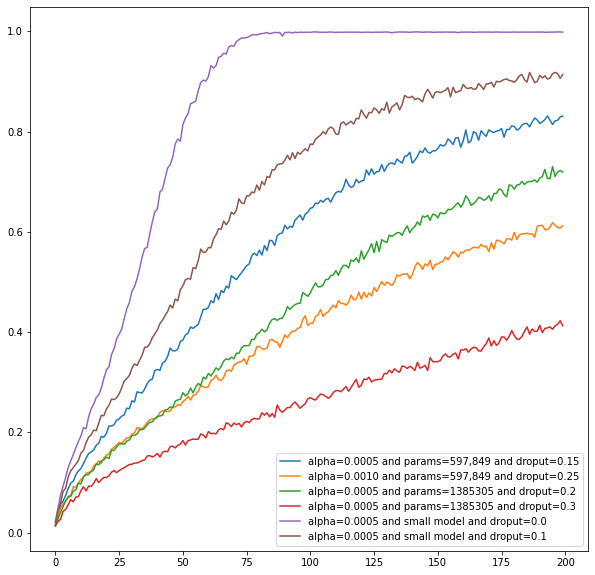

In [66]:

from matplotlib import pyplot as plt
fig=plt.figure(figsize=(10,10))
for i in range(len(hist_train_acc)):
  plt.plot(hist_train_acc[i],label=label[i])
plt.legend(fontsize=10)
plt.show()

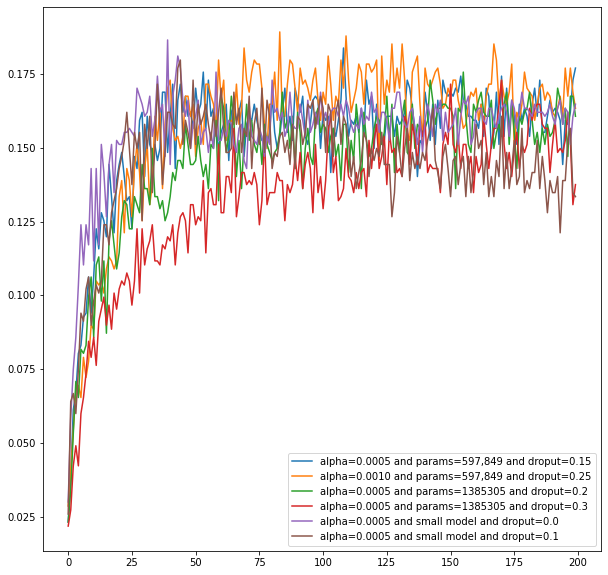

In [67]:
fig=plt.figure(figsize=(10,10))
for i in range(len(hist_val_acc)):
  plt.plot(hist_val_acc[i],label=label[i])
plt.legend()
plt.show()